In [11]:
import pandas as pd
import numpy as np
import seaborn as sns



In [5]:
df=pd.read_csv("penguins_simple.csv",sep=";")
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df=df[df["Species"]!= "Chinstrap"]
df["Species"].value_counts()

Adelie    146
Gentoo    119
Name: Species, dtype: int64

<ipython-input-17-4c05d8bdaba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spices_category"]=np.where(df["Species"]=="Adelie",0,1)


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

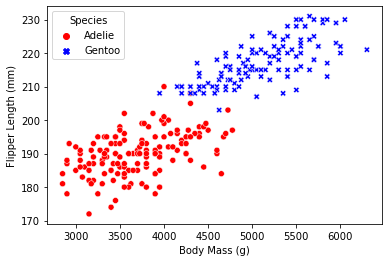

In [18]:
sns.scatterplot(x="Body Mass (g)",y="Flipper Length (mm)",data=df,hue="Species",style="Species",palette=["red","blue"])

In [19]:
df["Spices_category"]=np.where(df["Species"]=="Adelie",0,1)

<ipython-input-19-4c05d8bdaba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spices_category"]=np.where(df["Species"]=="Adelie",0,1)


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

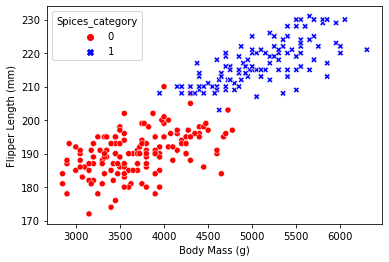

In [25]:
sns.scatterplot(x="Body Mass (g)",y="Flipper Length (mm)",data=df,hue="Spices_category",style="Spices_category",palette=["red","blue"])

**2) Build the model**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X=df[["Body Mass (g)","Flipper Length (mm)"]]
y=df["Spices_category"]

In [29]:
X.shape,y.shape

((265, 2), (265,))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [31]:
df.isna().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Spices_category        0
dtype: int64

In [32]:
X_train=(X_train-X_train.mean())/X_train.std()   
#Normalization******

In [33]:
X_test=(X_test-X_test.mean())/X_test.std()  

**instate model**

In [34]:
m=LogisticRegression()

**Train the model**

In [35]:
m.fit(X_train,y_train)

LogisticRegression()

**Our coefficent**

In [36]:
m.coef_,m.intercept_

(array([[1.64705329, 3.60836991]]), array([-0.67157121]))

In [38]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Spices_category
count,265.000000,265.000000,265.000000,265.000000,265.000000
mean,42.750566,16.842642,202.286792,4328.679245,0.449057
std,5.214804,2.009775,15.018953,839.748875,0.498339
min,32.100000,13.100000,172.000000,2850.000000,0.000000
25%,38.600000,15.000000,190.000000,3600.000000,0.000000
50%,42.000000,17.000000,198.000000,4300.000000,0.000000
75%,46.800000,18.500000,215.000000,5000.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


**3) Evaluate the model**  try the Test data values on your maodel

In [39]:
#score on the training data
m.score(X_train,y_train)

0.9811320754716981

In [40]:
#score on the testing data
m.score(X_test,y_test)

1.0

**4) Predict**

In [41]:
m.coef_

array([[1.64705329, 3.60836991]])

In [42]:
from matplotlib.colors import ListedColormap
